# Неделя Трансформеров: День 3. Темная (математическая) сторона LLM.

It's Wednesday, my dudes.

Отдохнули от формул? Сегодня их будет много)))

Мы разберем две свежие (2025 год) статьи с громкими названиями. Ред флагом является то, что авторы обеих статей не выложили код в открытый доступ. Поэтому будем разбирать математические идеи, описанные в этих статьях. Cледуя совету авторов Attention is All You Need, авторы обеих статей модифицируют скалярное произведение.

Первая статья, разработанная в Стенфорде, черпает идеи в математической психологии. Поскольку глобальная цель разработки нейронных сетей - приближение к человеческому суждению, данный подход представляет интерес (а возможно, это односезонное аниме - время покажет). Модифицируются Linear блоки.

Вторая статья, подготовленная в Hangzhou Dianzi University, предлагает нам вспомнить дифференциальную геометрию и обобщить скалярное произведение до римановой метрики.

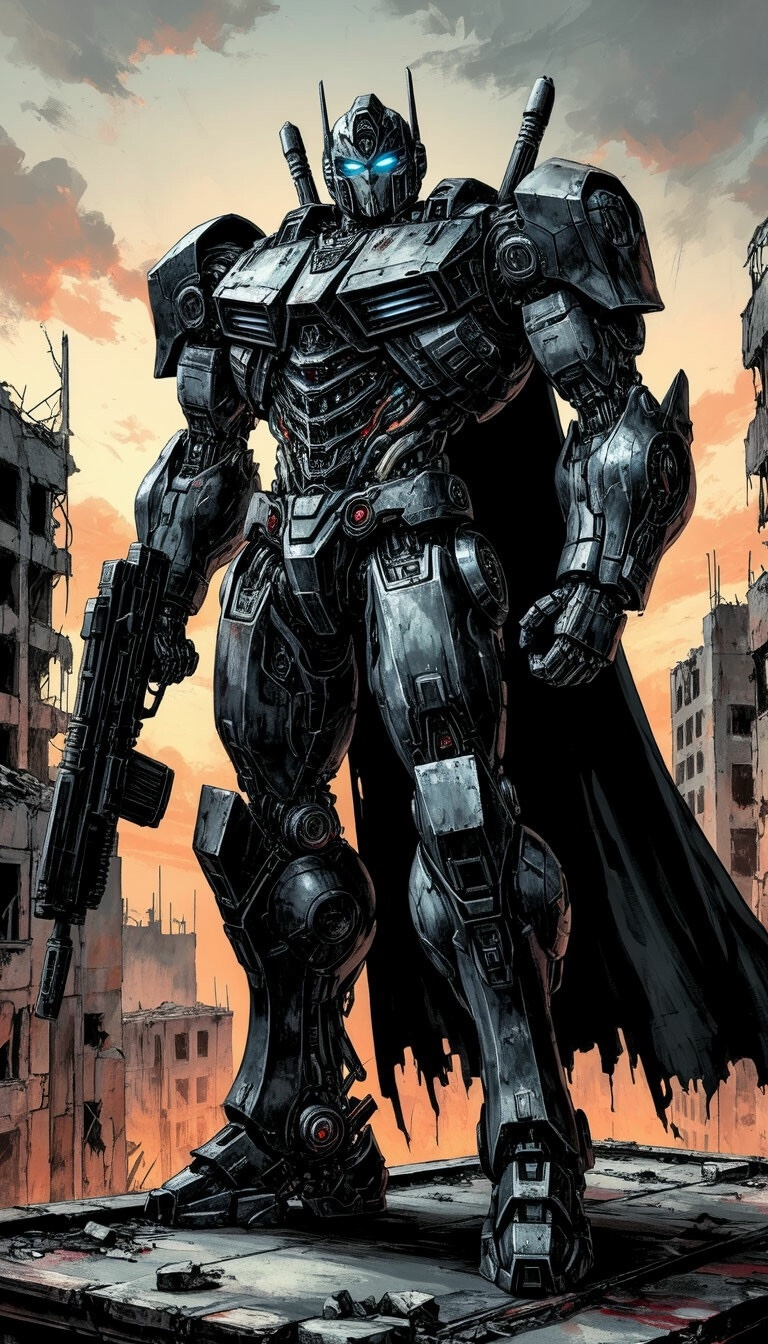

In [8]:
from IPython.display import Image
Image('3_Title.jpg', width=300, height=150 )

# Содержание
     1. Психологическая атака: асимметричное внимание
     2. Дифференциальная геометрия: риманова метрика
     3. Ред и Грин флаги
     4. Полезные ссылки (ML/DS круги общения)

# 1. Психологическая атака: асимметричное внимание

Первый подход, который я хочу отметить, пришел из психологии. 

21 May 2025 

Moussa Koulako Bala Doumbouya,    Dan Jurafsky,    Christopher D. Manning (Stanford) 

**Psychologically Plausible Deep Learning with Differentiable Tversky Similarity** https://arxiv.org/html/2506.11035v1

## Идея

Израильский математик-психолог Amos Tversky (1937-1996) служил в Цахале в качестве десантника, дослужившись до звания капитана. Прыгал с парашютом в зонах боевых действий во время Суэцкого кризиса в 1956, командовал пехотным подразделением во время Шестидневной войны в 1967 и служил в подразделении психологии на поле боя во время Войны Судного дня в 1973.

С 1970 трудился в Стэнфордском университете. В 1977 году предложил следующее математическое суждение о сходстве. Человеческое восприятие часто асимметрично - сын похож на отца больше, чем отец на сына. Тверски предложил математическую формулировку асимметричной схожести - Tversky index
$${\displaystyle S(X,Y)={\frac {|X\cap Y|}{|X\cap Y|+\alpha |X\setminus Y|+\beta |Y\setminus X|}}},$$
X - множество признаков отца (прототипа), Y - множество признаков сына , если $\alpha>\beta$.  

На самом деле, это обобщение пересечения, деленого на объединение (индекса Жаккара), такие обобщения достаточно распространены (см. например, сходство Джаро — Винклера). 

Внимательный читатель скажет: но эта конструкция дискретна! На что авторы статьи скажут: Мы придумали Differentiable Tversky Similarity.

## Differentiable Tversky Similarity 

A. Dual Representation of Objects as Vectors and as Sets:

Пусть $f_k\in R^d$, $k=1,...,|\Omega|$ - в первом приближении веса слоя.

Каждый элемент представляется в виде вектора $x\in R^d$ и множества  $X=\{f_k∈Ω|x⋅f_k>0\}$.

Интерпретация: $f_k$ - набор обучаемых прототипов, с которыми сравнивается входящий x.  

B. Salience

Тверски ввел величину значимости как то, куда направлена асимметрия внимания ($\alpha$, если $\alpha>\beta$). Авторы определяют значимость объекта A как
$$f⁢(A)=\sum_{k=1}^{\Omega}a⋅f_k⋅1{[a⋅f_k>0]},$$
где $1{[Condition]}$ - индикатор, равен 1 если выполнено $Condition$ и 0 иначе.

Тогда пересечение в Tversky index интерпретируются следующим образом:
$$f⁢(A∩B)=∑_{k=1}^{|Ω|}Ψ⁢(a⋅f_k,b⋅f_k)×1{⁢[a⋅f_k>0∧b⋅f_k>0]},$$
где $\Psi$ - гиперпараметр - **дифференцируемая** функция из разряда min, max, product, mean, gmean and softmin. 

Разность множеств f⁢(A−B) считается в двух случаях (аргументы индикатора)
 	 	$$∑_{x=1}^{|Ω|}(a⋅f_k)×1[a⋅f_k>0∧b⋅f_k≤0]$$
	$$∑_{k=1}^{|Ω|}(a⋅f_k−b⋅f_k)×1⁢[a⋅f_k>0∧b⋅f_k>0∧a⋅f_k>b⋅f_k]$$
Таким образом, у нас все дифференцируемо и в работу вступают алгоритмы обучения, которые, собственно, и требуют дифференцируемость. 

2. Tversky Neural Network Modules

Наконец, соберем введенные выше конструкции в блоки нейронной сети.

Tversky Similarity Layer:

$𝒮^{Ω,α,β,θ}⁢(a,b)$ отображает пару векторов (a, b) в тройку векторов Tversky index $(θf⁢(A∩B), −αf⁢(A−B), −βf⁢(B−A)).$

Tversky Projection Layer:

Введем множество прототипов $Π_i∈ℝ^d$, $i=0,...,p-1$. Посчитаем для входящего вектора $a∈ℝ^d$ схожести $𝒮^{Ω,α,β,θ}⁢(a,Π_{i})$. Здесь происходит разделение обязанностей: фичи $f_i$ - извлекают признаки из данных, прототипы $Π_i$ - учатся быть идеальными представителями своих классов.

Итого, обучаемыми параметрами являются  вектор прототипов Π, вектор фичей Ω, и веса в индексе Тверски α, β, ⁢θ. 


## Простой пример: проблема Xor
Логическая функция XoR(a, b) = 1, если a=b и 0 иначе. Простой однослойной нейронной сетью ее не реализовать. Суть проблемы исключающего или
https://ru.stackoverflow.com/questions/674268/%D0%A1%D1%83%D1%82%D1%8C-%D0%BF%D1%80%D0%BE%D0%B1%D0%BB%D0%B5%D0%BC%D1%8B-%D0%B8%D1%81%D0%BA%D0%BB%D1%8E%D1%87%D0%B0%D1%8E%D1%89%D0%B5%D0%B3%D0%BE-%D0%B8%D0%BB%D0%B8

Двухслойный перцептрон с 8 весами уже может решить эту задачу https://habr.com/ru/articles/516572/

Один слой Tversky Projection Layer с 11 весами также решает эту задачу. Идею авторы описывают на рисунке 1, а вычисления - в приложении D.

## Эксперименты

1. TverskyResNet50: Tversky Projection Layer меняет последний слоей в нейросети ResNet-50. 

2. TverskyGPT-2: в GPT-2 на Tversky Projection Layer меняется финальный линейный блок, либо меняются Linear-блоки внутри MultiheadAttention, либо все и сразу.

3. VisualTverskyMNISTNet: в нейросети VisualMNISTNet меняется финальные три блока на 1 Tversky Projection Layer.

Модели обучаются в одних условиях на одинаковых датасетах. Результаты экспериментов: улучшение метрик во всех случаях.

# 2. Дифференциальная геометрия: риманова метрика

Второй подход пришел из дифференциальной геометрии

9 Jun 2025

Zhongping Ji (Hangzhou Dianzi University)

RiemannFormer: A Framework for Attention in Curved Spaces
https://arxiv.org/abs/2506.07405

## Идея

Авторы оригинальной статьи отмечали, что механизм внимания, не смотря на всю свою элегантность, может быть дополнительно улучшен, если вместо скалярного произведения взять альтернативную функцию, например, нейросеть. 

Автор данной статьи (https://scholar.google.com/citations?user=fUEQZ08AAAAJ&hl=ru&oi=ao) является опытным специалистом в областях Computer Graphics и Image Processing, что, вероятно, оправдывает эмпирические выборы конструкций в RiemannFormer.

Предлагается интерпретировать данные, с которыми мы работаем, следующим образом: 

Эмбеддинги - точки на некотором $D$-мерном многообразии, а соответствующие этой строке q, k, v - касательные векторы к многообразию в этих точках. Таким образом:

во-первых перемножать $q_i$ c $k_j$ не вполне корректно, ведь они находятся в  касательных пространствах к разным точкам.   

во-вторых в дело вступает риманова метрика - обобщение скалярного произведения на многообразии. Положительно определенная невырожденная матрица $M_m$ со специальным правилом перехода при смене системы координат.

Для вычисления $P_{n→m}(k_n)$ параллельного переноса вектора вдоль многообразия существует целая теория, в которой в том числе встречается  риманова связность ∇, вычисляемая достаточно нетривиально. Но поскольку о структуре многообразия мы ничего не знаем...мы обучим линейные отображения между касательными пространствами как веса нейросети!

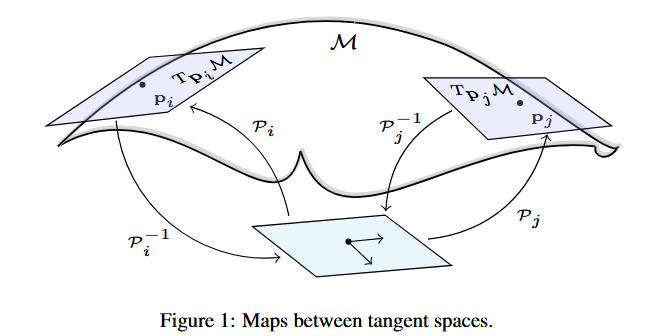

In [9]:
Image('3_1.png', width=600, height=150 )
# Н - ностальгия

Как в курсе дифференциальной геометрии, введем буферное пространство $R^D$ и отображение между касательными пространствами представляется формулой $P_{n→m}(k_n) = P_m ◦ P^{−1}_n (k_n) = T_mT^{−1}_n k_n$
в предположении, что перенос из буферного пространства в касательное задается линейным преобразованием $P_m(k_m) = T_m\cdot k_m, T_m\in R^{d\times d}$.

Далее автор для простоты ограничивается случаем диагональной римановой метрики $M_m = diag(s_i^m)$, i - это номер, а не мнимая единица. Из геометрических соображений, авторы ищут решение в виде $T = s^{−i/2}\exp(iX)$, s и X также выбираются особым образом. После преобразований и упрощений, улучшенное скалярное произведение принимает вид $⟨T^{−1}_m q_m, T^{−1}_n k_n⟩$, где $T^{−1}_j$ содержат новые обучаемые параметры.

## Locality Focusing

Еще одно улучшение, которое предложено в данной статье - введение множителей затухания, дополнительно уменьшающих скалярное произведение для отдаленных точек.
$v^'_m(q_m) = Attention(q_m, K, Λ, V) = softmax (q_m\cdot K^⊤/
\sqrt{d_k}\cdot (ΛV),$
где в одномерном случае $Λ = diag(\lambda_{m,i})$.

Эксперименты показывают, что качество на маленькой модели и маленьком датасете растет, и автор анонсирует масштабирование исследования.

# 3. Ред и Грин флаги

**Сплошной ред флаг**. При подготовке остановился на статье с громким названием Traveling Words: A Geometric Interpretation of Transformers, Raul Molina, https://arxiv.org/abs/2309.07315 . Что вызывает недоверие к статье? Нет аффилиации, статья отклонена конференцией и раскритикована https://openreview.net/forum?id=cSSHiLnjsJ .
У автора всего одна статья. Но зато есть код на гитхаб.

Сталкиваясь с подобными кейсами, невольно задаешься вопросом: автор научный фрик или непризнанный гений, отвергнутый научным лобби? Вроде же не сходимость гармонического ряда доказывает (реальный случай с одной математической конференции). 

При беглом чтении статьи каких-то ярких идей я не обнаружил. Изучается влияние Layer Normalization и геометрическая интерпретация трансформера как функции, двигающей эмбеддинг по гиперповерхности.  Но, возможно, Вы вдохновитесь на исследование и разовьете такой подход?)

**Грин флагами**, соответственно, являются аффилиация, присутствие на конференциях, хорошие ревью на https://openreview.net/ и открытый код, чтобы можно было видеть соответствие теории и практики. В сфере ML и DS  выкатывается такое количество статей, что даже в рамках одной средней конференции просто чтение всех abstract-ов может занять часы. Остается только поиск по ключевым словам (который реализован на сайте) или элемент удачи, типа крутого знакомства в очереди за кофе.

# 4. Полезные ссылки

И, чтобы подчеркнуть важность ссылки, продублирую ее

https://openreview.net/

Несколько ссылок для поисков единомышленников в изучении современных статей:

1. Xiaol.X: видеообзоры свежих ML-статей на замедленном в РФ ресурсе с красной кнопкой.

2. gonzo-обзоры ML статей:
https://t.me/gonzo_ML и 
https://t.me/gonzo_ML_podcasts

3. AbstractDL
https://t.me/abstractDL
обнаружил канал при подготовке к предыдущим дням, вроде познавательно

4. (sci)Berloga Science
https://t.me/sberlogasci
Целое сообщество) Основная задача - исследование графов Кэли методами ML, некоторое время назад искали энтузиастов для сотрудничества и возможных публикаций. Также есть подразделы, где разбираются статьи по ML, математике, физике... и даже кружок по изучению английского.

В оставшиеся дни я подготовил разбор пары интересных модификаций трансформеров и небольшой бонус. Ну и воскресенье надо оставить на то, чтобы за один день наверстать все упущенное летом.